In [ ]:
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk

**CLEANING**

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ds=pd.read_csv('train.csv')
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    text = ' '.join(tokens)
    return text

In [ ]:
ds['text'] = ds['text'].astype(str).apply(clean_text)

# Preview cleaned data
ds.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Deeds Reason May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive evacuation orders California,1
4,7,NaN,NaN,got sent photo Ruby smoke pours school,1


In [ ]:
ds = ds.fillna('')

**EXPLORATORY DATA ANALYSIS**

In [ ]:
from collections import Counter
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

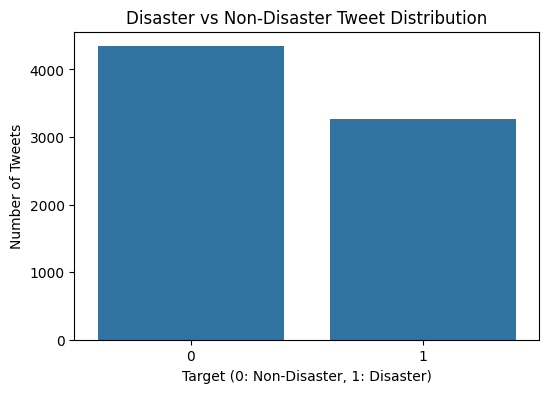

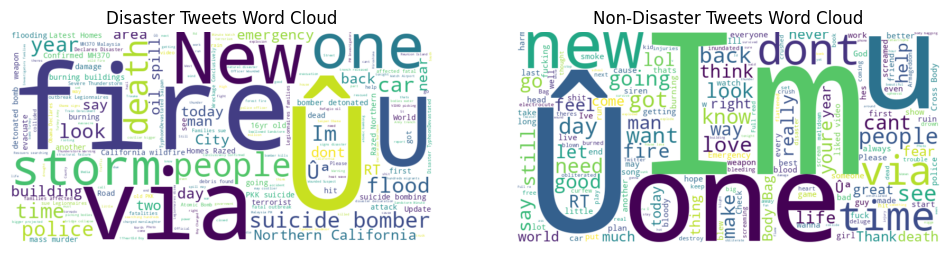

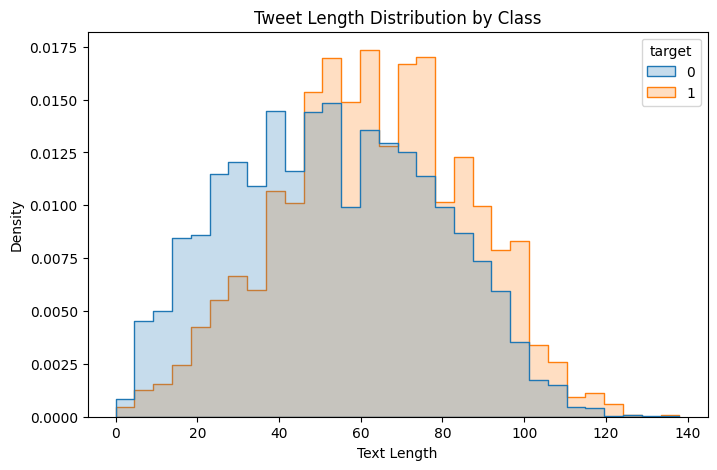

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common words in Disaster Tweets:
[('fire', 177), ('via', 121), ('suicide', 110), ('disaster', 110), ('california', 107), ('police', 106), ('people', 104), ('killed', 92), ('like', 92), ('fires', 85), ('crash', 83), ('storm', 83), ('news', 82), ('families', 81), ('train', 79), ('us', 77), ('buildings', 75), ('bomb', 74), ('emergency', 73), ('two', 71)]

Most Common words in Non-Disaster Tweets:
[('like', 253), ('im', 243), ('new', 168), ('get', 163), ('dont', 141), ('one', 128), ('body', 111), ('via', 99), ('would', 97), ('video', 94), ('people', 91), ('love', 86), ('know', 85), ('got', 84), ('back', 83), ('time', 82), ('see', 82), ('cant', 81), ('full', 81), ('us', 80)]


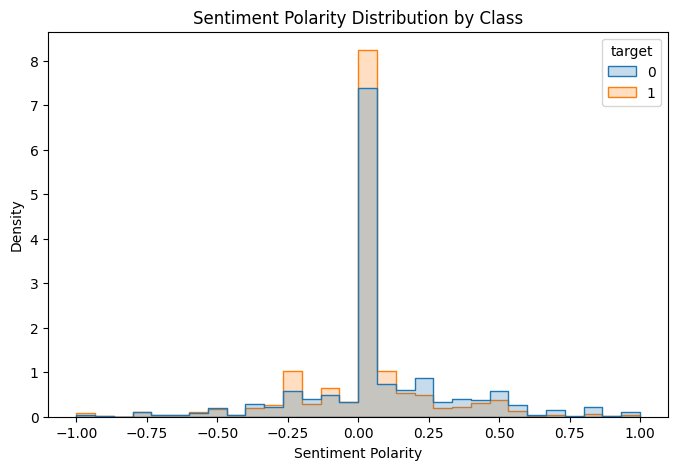

In [ ]:

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=ds)
plt.title('Disaster vs Non-Disaster Tweet Distribution')
plt.xlabel('Target (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

# Generate word clouds for each class
disaster_text = ' '.join(ds[ds['target'] == 1]['text'].astype(str).tolist())
nondisaster_text = ' '.join(ds[ds['target'] == 0]['text'].astype(str).tolist())

disaster_wc = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)
nondisaster_wc = WordCloud(width=800, height=400, background_color='white').generate(nondisaster_text)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(disaster_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Disaster Tweets Word Cloud')
plt.subplot(1,2,2)
plt.imshow(nondisaster_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Disaster Tweets Word Cloud')
plt.show()

# Text length exploration
ds['text_len'] = ds['text'].astype(str).apply(len)
plt.figure(figsize=(8,5))
sns.histplot(ds, x='text_len', hue='target', element='step', stat='density', common_norm=False, bins=30)
plt.title('Tweet Length Distribution by Class')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# Most frequent words (excluding stopwords)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_most_common_words(text_series, n=20):
    words = ' '.join(text_series).lower().split()
    clean_words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(clean_words).most_common(n)

print('Most Common words in Disaster Tweets:')
print(get_most_common_words(ds[ds['target']==1]['text']))
print('\nMost Common words in Non-Disaster Tweets:')
print(get_most_common_words(ds[ds['target']==0]['text']))

# Sentiment pattern analysis
# Compute polarity using TextBlob
ds['polarity'] = ds['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(ds, x='polarity', hue='target', element='step', stat='density', common_norm=False, bins=30)
plt.title('Sentiment Polarity Distribution by Class')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.show()


**FEATURE ENGINEERING**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

texts = ds['text'].astype(str)  # Change 'text' if your column has another name

# TF-IDF: Unigram (1,1)
vectorizer_uni = TfidfVectorizer(ngram_range=(1,1), max_features=1000)
X_uni = vectorizer_uni.fit_transform(texts)
print("Unigram TF-IDF shape:", X_uni.shape)

# TF-IDF: Bigram (1,2)
vectorizer_bi = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
X_bi = vectorizer_bi.fit_transform(texts)
print("Bigram TF-IDF shape:", X_bi.shape)

# TF-IDF: Trigram (1,3)
vectorizer_tri = TfidfVectorizer(ngram_range=(1,3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(texts)
print("Trigram TF-IDF shape:", X_tri.shape)

# Show sample features for each
print("Sample Unigram Features:", vectorizer_uni.get_feature_names_out()[:10])
print("Sample Bigram Features:", vectorizer_bi.get_feature_names_out()[:10])
print("Sample Trigram Features:", vectorizer_tri.get_feature_names_out()[:10])


Unigram TF-IDF shape: (7613, 1000)
Bigram TF-IDF shape: (7613, 1000)
Trigram TF-IDF shape: (7613, 1000)
Sample Unigram Features: ['05' '10' '100' '11' '11yearold' '12' '12000' '13' '15' '16']
Sample Bigram Features: ['05' '10' '100' '11' '11yearold' '11yearold boy' '12' '13' '15' '16yr']
Sample Trigram Features: ['05' '10' '11' '11yearold' '11yearold boy' '11yearold boy charged' '12'
 '13' '15' '16yr']


**DATA TRAINING & EVALUATION**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Prepare features and labels
X = X_uni  # or X_bi or X_tri as per your choice from TF-IDF
y = ds['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_results = {}

# 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
model_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_logreg),
    'precision': precision_score(y_test, y_pred_logreg),
    'recall': recall_score(y_test, y_pred_logreg),
    'f1': f1_score(y_test, y_pred_logreg),
    'confusion_matrix': confusion_matrix(y_test, y_pred_logreg)
}

# 2. Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
model_results['Multinomial Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb),
    'recall': recall_score(y_test, y_pred_nb),
    'f1': f1_score(y_test, y_pred_nb),
    'confusion_matrix': confusion_matrix(y_test, y_pred_nb)
}

# 3. Support Vector Machine
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
model_results['Support Vector Machine'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1': f1_score(y_test, y_pred_svm),
    'confusion_matrix': confusion_matrix(y_test, y_pred_svm)
}

# Show and compare results
for model, metrics in model_results.items():
    print(f"\n--- {model} ---")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()

# Optionally, detailed classification reports
print("\nClassification Reports:")
print("Logistic Regression\n", classification_report(y_test, y_pred_logreg))
print("Multinomial Naive Bayes\n", classification_report(y_test, y_pred_nb))
print("Support Vector Machine\n", classification_report(y_test, y_pred_svm))



--- Logistic Regression ---
Accuracy: 0.7912
Precision: 0.8004
Recall: 0.6795
F1 Score: 0.7350
Confusion Matrix:
[[764 110]
 [208 441]]


--- Multinomial Naive Bayes ---
Accuracy: 0.7774
Precision: 0.7849
Recall: 0.6579
F1 Score: 0.7158
Confusion Matrix:
[[757 117]
 [222 427]]


--- Support Vector Machine ---
Accuracy: 0.7774
Precision: 0.7583
Recall: 0.7011
F1 Score: 0.7286
Confusion Matrix:
[[729 145]
 [194 455]]


Classification Reports:
Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Multinomial Naive Bayes
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       874
           1       0.78      0.66      0.72       649

    accuracy     